In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from experiment_constant import *
import pickle
from experiment_mnist import *
import pickle

Using TensorFlow backend.


In [31]:
dta = MNISTExperiment([10], 0.1, 10, epochs = 0, activation = 'sigmoid', reg_type = 'delta')
x = np.vstack((dta.x_train, dta.x_test))
y = np.vstack((dta.y_train, dta.y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [3]:
#experiment = MNISTExperiment([10, 10], [0.1, 0], 10, epochs = 100, activation = 'relu', reg_type = 'delta',
#                             reg_coeff = 0, do_print = True)
#for a, b in zip(experiment.model_no_dropout.get_weights(), experiment.model.get_weights()):
#    assert np.allclose(a, b)
#weights = experiment.model_no_dropout.get_weights()
#W = weights[0::2]
#B = weights[1::2]
#pickle.dump([W, B], open('mnistnet100percenttightness.pkl', 'wb'))

In [4]:
[W, B] = pickle.load(open('mnistnet100percenttightness.pkl', 'rb'))
experiment = ConstantExperiment([28 ** 2, 10, 10, 10], [0.1, 0], 10, W, B, activation = 'relu')

In [5]:
mean_bound, std_bound = experiment.get_mean_std_error()

In [6]:
inp = np.random.randn(28 ** 2)
errors = experiment.get_error(inp, repetitions = 100000)
mean_exp = np.mean(np.abs(errors))
print(mean_exp / mean_bound)

inf


/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


100%|██████████| 100/100 [00:00<00:00, 104.11it/s]


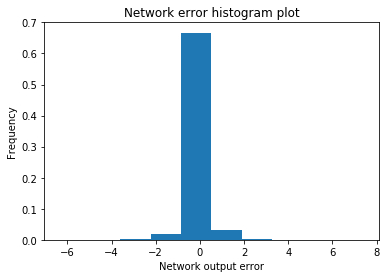

Error; maximal over inputs, average over dropout:
True values array mean: 0.066855 variance 1.257948
Experiment 0.825192 Std 1.814435
Equation   17.559561 Std 27.736522
Tightness  4.7% Std 6.5%


(0.82519233, 1.8144352, 17.559560960044887, 27.736522398319, 1.2579476)

In [7]:
experiment.update_C(x)
experiment.run(repetitions = 1000, inputs = 100)

In [8]:
#errors = [experiment.get_error(obj, repetitions = 100) for obj in tqdm(x)]

In [9]:
#np.max(np.mean(np.abs(errors), axis = 1))

In [21]:
def calculate_output(exp, x, p = 0.1):
    inp = x
    layers = []
    assert len(exp.W) == len(exp.B)
    for i, (w, b) in enumerate(zip(exp.W, exp.B)):
        if i >= 0:
            dead_neurons = np.where(np.random.rand(w.shape[0]) <= p)[0]
            w = np.copy(w)
            w[dead_neurons, :] = 0
        is_last = i == len(exp.W) - 1
        act = (lambda x : x) if is_last else (lambda x : exp.K * np.maximum(x, 0))
        layers.append(np.max(inp))
        plt.figure()
        plt.title('Activations for layer %d' % i)
        #print(inp)
        plt.hist(inp.reshape(-1))
        plt.show()
        inp = act((inp @ w) + b).reshape(x.shape[0], -1)
    return inp, layers

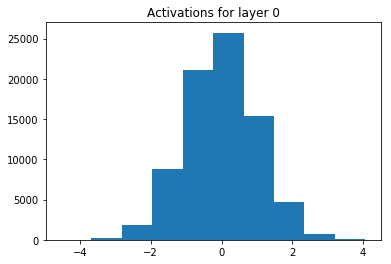

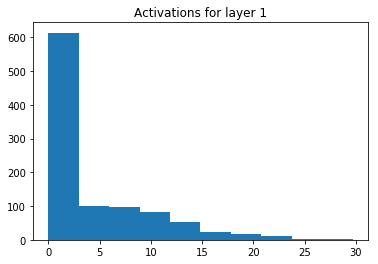

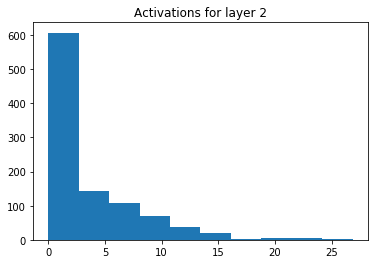

In [24]:
x = calculate_output(experiment, np.random.randn(100, 784), p = 0.5)

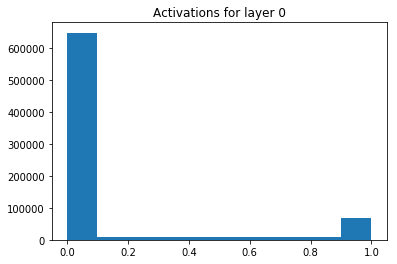

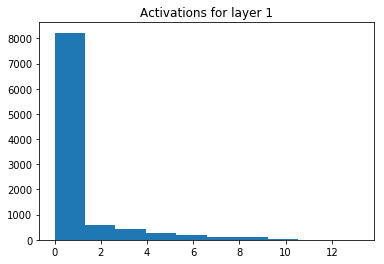

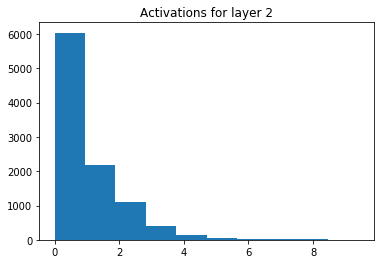

In [33]:
z = calculate_output(experiment, x[:1000, :], p = 0.5)

In [30]:
x[0].shape

(100, 10)

In [23]:
experiment.C

array([49.82485962, 55.65070724])